# Preparing DATASET done

In [0]:
import torchvision
import torchvision.transforms as transforms
import torch
import torch.optim as optim
'''Parameters of DataLoader
        dataset (Dataset): dataset from which to load the data.
        batch_size (int, optional): how many samples per batch to load
            (default: ``1``).
        shuffle (bool, optional): set to ``True`` to have the data reshuffled
            at every epoch (default: ``False``).
        num_workers (int, optional): how many subprocesses to use for data
            loading. ``0`` means that the data will be loaded in the main process.
            (default: ``0``)
'''

'''
transforms.Normalize does the following for each channel:
image = (image - mean) / std
Normalization does helps CNN perform better.
Normalization helps get data within a range and reduces the skewness which helps learn faster and better
'''
print('==> Preparing data..')
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])




trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
# trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)

test_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=100, shuffle=False, num_workers=2)
valid_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_train)
# valid_loader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)
import numpy as np
from torch.utils.data import SubsetRandomSampler
valid_size=0.1
batch_size=64
num_workers=0
pin_memory=False
num_train = len(trainset)
indices = list(range(num_train))
split = int(np.floor(valid_size * num_train))
print(split)

train_idx, valid_idx = indices[split:], indices[:split]
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

train_loader = torch.utils.data.DataLoader(
        trainset, batch_size=batch_size, sampler=train_sampler,
        num_workers=num_workers, pin_memory=pin_memory,
)
valid_loader = torch.utils.data.DataLoader(
        valid_dataset, batch_size=batch_size, sampler=valid_sampler,
        num_workers=num_workers, pin_memory=pin_memory,
)
# a=trainset.keys
# print(len(a))
data_loaders = {"Train": train_loader, "Val": valid_loader}


==> Preparing data..
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
5000


In [0]:
from __future__ import print_function
import torch
import torchvision
import torchvision.transforms as transforms
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout

#Inception V1/V2 module done

In [0]:
import torch.nn as nn

class Inception_v1(nn.Module):

    def __init__(self, in_channels, ch1x1, ch3x3red, ch3x3, ch5x5red, ch5x5, pool_proj):
        super(Inception_v1, self).__init__()

        self.branch1 = BasicConv2d(in_channels, ch1x1, kernel_size=1)

        self.branch2 = nn.Sequential(
            BasicConv2d(in_channels, ch3x3red, kernel_size=1),
            BasicConv2d(ch3x3red, ch3x3, kernel_size=3, padding=1)
        )

        self.branch3 = nn.Sequential(
            BasicConv2d(in_channels, ch5x5red, kernel_size=1),
            BasicConv2d(ch5x5red, ch5x5, kernel_size=5, padding=2,stride=1)
        )

        self.branch4 = nn.Sequential(
            nn.MaxPool2d(kernel_size=3, stride=1, padding=1, ceil_mode=True),
            BasicConv2d(in_channels, pool_proj, kernel_size=1)
        )

    def forward(self, x):
        branch1 = self.branch1(x)
        branch2 = self.branch2(x)
        branch3 = self.branch3(x)
        branch4 = self.branch4(x)

        outputs = [branch1, branch2, branch3, branch4]
        return torch.cat(outputs, 1)

In [0]:

class Inception_v2(nn.Module):

    def __init__(self, in_channels, ch1x1, ch3x3red, ch3x3, ch5x5red, ch5x5, pool_proj):
        super(Inception_v2, self).__init__()

        self.branch1 = BasicConv2d(in_channels, ch1x1, kernel_size=1)

        self.branch2 = nn.Sequential(
            BasicConv2d(in_channels, ch3x3red, kernel_size=1),
            BasicConv2d(ch3x3red, ch3x3, kernel_size=3, padding=1)
        )

        self.branch3 = nn.Sequential(
            BasicConv2d(in_channels, ch5x5red, kernel_size=1),
            BasicConv2d(ch5x5red, ch5x5, kernel_size=3, padding=1),
            BasicConv2d(ch5x5, ch5x5, kernel_size=3, padding=1)
        )

        self.branch4 = nn.Sequential(
            nn.MaxPool2d(kernel_size=3, stride=1, padding=1, ceil_mode=True),
            BasicConv2d(in_channels, pool_proj, kernel_size=1)
        )

    def forward(self, x):
        branch1 = self.branch1(x)
        branch2 = self.branch2(x)
        branch3 = self.branch3(x)
        branch4 = self.branch4(x)

        outputs = [branch1, branch2, branch3, branch4]
        return torch.cat(outputs, 1)


#Google Net done

In [0]:
import warnings
from collections import namedtuple
import torch
import torch.nn as nn
import torch.nn.functional as F
_GoogLeNetOutputs = namedtuple('GoogLeNetOutputs', ['logits', 'aux_logits2', 'aux_logits1'])




class BasicConv2d(nn.Module):

    def __init__(self, in_channels, out_channels, **kwargs):
        super(BasicConv2d, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, bias=False, **kwargs)
        self.bn = nn.BatchNorm2d(out_channels, eps=0.001)

    def forward(self, x):
        x = self.conv(x)
        x = self.bn(x)
        return F.relu(x, inplace=True)


class InceptionAux(nn.Module):

    def __init__(self, in_channels, num_classes):
        super(InceptionAux, self).__init__()
        self.conv = BasicConv2d(in_channels, 128, kernel_size=1)

        self.fc1 = nn.Linear(2048, 1024)
        self.fc2 = nn.Linear(1024, num_classes)

    def forward(self, x):
        # aux1: N x 512 x 14 x 14, aux2: N x 528 x 14 x 14
        x = F.adaptive_avg_pool2d(x, (4, 4))
        # aux1: N x 512 x 4 x 4, aux2: N x 528 x 4 x 4
        x = self.conv(x)
        # N x 128 x 4 x 4
        x = torch.flatten(x, 1)
        # N x 2048
        x = F.relu(self.fc1(x), inplace=True)
        # N x 2048
        x = F.dropout(x, 0.7, training=self.training)
        # N x 2048
        x = self.fc2(x)
        # N x 1024

        return x


In [0]:
class GoogleNet(nn.Module):
    def __init__(self, Inception=Inception_v1,num_classes=10, aux_logits=False):
        super(GoogleNet, self).__init__()
        self.aux_logits = aux_logits

        self.conv1 = BasicConv2d(3, 64, kernel_size=7, stride=2, padding=3)
        self.maxpool1 = nn.MaxPool2d(3, stride=2, ceil_mode=True)
        self.conv2 = BasicConv2d(64, 64, kernel_size=1)
        self.conv3 = BasicConv2d(64, 192, kernel_size=3, padding=1)
        self.maxpool2 = nn.MaxPool2d(3, stride=2, ceil_mode=True)

        self.inception3a = Inception(192, 64, 96, 128, 16, 32, 32)
        self.inception3b = Inception(256, 128, 128, 192, 32, 96, 64)
        self.maxpool3 = nn.MaxPool2d(3, stride=2, ceil_mode=True)

        self.inception4a = Inception(480, 192, 96, 208, 16, 48, 64)
        self.inception4b = Inception(512, 160, 112, 224, 24, 64, 64)
        self.inception4c = Inception(512, 128, 128, 256, 24, 64, 64)
        self.inception4d = Inception(512, 112, 144, 288, 32, 64, 64)
        self.inception4e = Inception(528, 256, 160, 320, 32, 128, 128)
        self.maxpool4 = nn.MaxPool2d(2, stride=2, ceil_mode=True)

        self.inception5a = Inception(832, 256, 160, 320, 32, 128, 128)
        self.inception5b = Inception(832, 384, 192, 384, 48, 128, 128)

        if aux_logits:
            self.aux1 = InceptionAux(512, num_classes)
            self.aux2 = InceptionAux(528, num_classes)

        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.dropout = nn.Dropout(0.2)
        self.fc = nn.Linear(1024, num_classes)

    def forward(self, x):
        # N x 3 x 224 x 224
        x = self.conv1(x)
        # N x 64 x 112 x 112
        x = self.maxpool1(x)
        # N x 64 x 56 x 56
        x = self.conv2(x)
        # N x 64 x 56 x 56
        x = self.conv3(x)
        # N x 192 x 56 x 56
        x = self.maxpool2(x)

        # N x 192 x 28 x 28
        x = self.inception3a(x)
        # N x 256 x 28 x 28
        x = self.inception3b(x)
        # N x 480 x 28 x 28
        x = self.maxpool3(x)
        # N x 480 x 14 x 14
        x = self.inception4a(x)
        # N x 512 x 14 x 14
        if self.training and self.aux_logits:
            aux1 = self.aux1(x)

        x = self.inception4b(x)
        # N x 512 x 14 x 14
        x = self.inception4c(x)
        # N x 512 x 14 x 14
        x = self.inception4d(x)
        # N x 528 x 14 x 14
        if self.training and self.aux_logits:
            aux2 = self.aux2(x)

        x = self.inception4e(x)
        # N x 832 x 14 x 14
        x = self.maxpool4(x)
        # N x 832 x 7 x 7
        x = self.inception5a(x)
        # N x 832 x 7 x 7
        x = self.inception5b(x)
        # N x 1024 x 7 x 7

        x = self.avgpool(x)
        # N x 1024 x 1 x 1
        x = torch.flatten(x, 1)
        # N x 1024
        x = self.dropout(x)
        x = self.fc(x)
        # N x 1000 (num_classes)
        if self.training and self.aux_logits:
            return x, aux2, aux1
        return x


# Training and testing function done

In [0]:

# Training
def train(num_epochs,net,data_loaders,optimizer,device,criterion):
    train_acc=[]
    train_loss=[]
    val_acc=[]
    val_loss=[]
    for epoch in range(num_epochs):
      print('\nEpoch: %d' % epoch)
      loss = 0
      correct = 0
      total = 0
      for phase in ['Train', 'Val']:
          if phase == 'Train':
              # optimizer = scheduler(optimizer, epoch)
              net.train(True)  # Set model to training mode
              
          else:
              net.train(False)  # Set model to evaluate mode
          loader=data_loaders[phase]
          for batch_idx, (inputs, targets) in enumerate(loader):
              inputs, targets = inputs.to(device), targets.to(device)
              optimizer.zero_grad()
              # outputs = net(inputs)
              if phase == 'Train':
                outputs, aux2, aux1 = net(inputs)
                real_loss = criterion(outputs, targets)
                aux_loss_1 = criterion(aux1, targets)
                aux_loss_2 = criterion(aux2, targets)
                total_loss = real_loss + 0.3 * aux_loss_1 + 0.3 * aux_loss_2
                loss = total_loss
              else: 
                 outputs = net(inputs)
                 loss = criterion(outputs, targets)
              if phase == 'Train':
                loss.backward()
                # update the weights
                optimizer.step()
              loss += loss.item() # UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
              _, predicted = outputs.max(1)
              total += targets.size(0)
              correct += predicted.eq(targets).sum().item()
              # del inputs
              # del targets
              # torch.cuda.empty_cache()
              if phase=="Train":
                print("Train -- ",batch_idx, len(loader), " ",'Train loss: %.3f | Train acc: %.3f%% (%d/%d)'
                 % (loss/(batch_idx+1), 100.*correct/total, correct, total))
              else:

                print("Val -- ",batch_idx, len(loader), 'Val loss: %.3f | Val acc: %.3f%% (%d/%d)'
                 % (loss/(batch_idx+1), 100.*correct/total, correct, total))

          if phase=="Train":
            train_acc.append(100.*correct/total)
            train_loss.append(loss)
          else:
            val_acc.append(100.*correct/total)
            val_loss.append(loss)

    return train_acc,train_loss,val_acc,val_loss
        
#Testing 
def test(net,loader,criterion,device):
    net.eval() # Sets the model in evaluation mode
    test_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for batch_idx, (inputs, targets) in enumerate(loader):
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = net(inputs)
            loss = criterion(outputs, targets)
            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()

            # print(batch_idx, len(loader), ' Test Loss: %.3f | Test Acc: %.3f%% (%d/%d)'
                # % (test_loss/(batch_idx+1), 100.*correct/total, correct, total))
    test_acc=100.*correct/total
    print(' Test Loss: %.3f | Test Acc: %.3f%% (%d/%d)'% (test_loss/(batch_idx+1), 100.*correct/total, correct, total))
    return test_loss,test_acc


#don't run the training again , the saved model has 82.4 accuracy 
#if you want to increase the accuracy load the model , so we don't have to train the whole 20 epochs again 

#Training / validation / testing inception V1 done 

In [0]:
import time
import torch.backends.cudnn as cudnn
device = 'cuda' if torch.cuda.is_available() else 'cpu'

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
best_acc = 0  # best test accuracy
start_epoch = 0  # start from epoch 0 or last checkpoint epoch

# Model
print('==> Building model..')
net_v1 = GoogleNet(Inception_v1,len(classes),True)
net_v1 = net_v1.to(device)
if device == 'cuda':
    net_v1 = torch.nn.DataParallel(net_v1)
    cudnn.benchmark = True
#Loss and Optimization
criterion_v1 = nn.CrossEntropyLoss() # It is useful when training a classification problem with `C` classes.
# optimizer_v1 = optim.SGD(net_v1.parameters(), lr=0.05)
optimizer_v1=optim.Adam(net_v1.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)
time_start_v1 = time.time()
train_acc_v1,train_loss_v1,val_acc_v1,val_loss_v1=train(num_epochs=20,net=net_v1,data_loaders=data_loaders,optimizer=optimizer_v1,device=device,criterion=criterion_v1    )
time_end_v1 = time.time()
training_time_v1=time_end_v1-time_start_v1

print("Accuracy = ",train_acc_v1[-1],"Execution Time = ",training_time_v1 ,"seconds")

==> Building model..

Epoch: 0
Train --  0 704   Train loss: 7.688 | Train acc: 6.250% (4/64)
Train --  1 704   Train loss: 3.910 | Train acc: 10.938% (14/128)
Train --  2 704   Train loss: 2.519 | Train acc: 10.417% (20/192)
Train --  3 704   Train loss: 1.827 | Train acc: 13.281% (34/256)
Train --  4 704   Train loss: 1.468 | Train acc: 14.375% (46/320)
Train --  5 704   Train loss: 1.317 | Train acc: 15.365% (59/384)
Train --  6 704   Train loss: 1.062 | Train acc: 15.848% (71/448)
Train --  7 704   Train loss: 1.019 | Train acc: 15.430% (79/512)
Train --  8 704   Train loss: 0.828 | Train acc: 15.799% (91/576)
Train --  9 704   Train loss: 0.713 | Train acc: 16.562% (106/640)
Train --  10 704   Train loss: 0.649 | Train acc: 17.614% (124/704)
Train --  11 704   Train loss: 0.576 | Train acc: 18.229% (140/768)
Train --  12 704   Train loss: 0.599 | Train acc: 18.510% (154/832)
Train --  13 704   Train loss: 0.478 | Train acc: 19.085% (171/896)
Train --  14 704   Train loss: 0.466 | 

In [0]:
test_loss_v1,test_acc_v1=test(net=net_v1,loader=test_loader,criterion=criterion_v1,device=device)

 Test Loss: 0.531 | Test Acc: 82.400% (8240/10000)


#save v1 model done

In [0]:
torch.save(net_v1, "/content/weights_v1_epochs20.pth")
model = torch.load("/content/weights_v1_epochs20.pth")
model.eval()
test_loss,test_acc=test(net=model,loader=test_loader,criterion=criterion_v1,device=device)

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type DataParallel. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type GoogleNet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type BasicConv2d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Conv2d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/pyt

 Test Loss: 0.531 | Test Acc: 82.400% (8240/10000)


In [0]:
import shutil
shutil.copy("/content/weights_v1_epochs20.pth","/content/drive/My Drive")


'/content/drive/My Drive/weights_v1_epochs20.pth'

#V1 Graphs done

In [0]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
print(train_acc_v1)

[39.78666666666667, 55.24, 62.25555555555555, 66.6288888888889, 69.88, 72.33111111111111, 71.37333333333333, 75.35777777777778, 76.36888888888889, 77.6, 78.45111111111112, 79.44, 79.84, 80.75777777777778, 81.42888888888889, 82.33333333333333, 82.51555555555555, 83.30222222222223, 83.82444444444444, 84.27777777777777]


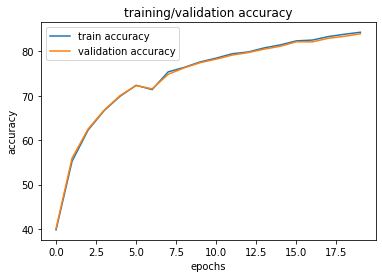

In [0]:
plt.plot(np.arange(0,len(train_acc_v1)),train_acc_v1,label="train accuracy")
plt.plot(np.arange(0,len(val_acc_v1)),val_acc_v1,label="validation accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.title('training/validation accuracy')
plt.legend()

plt.show()

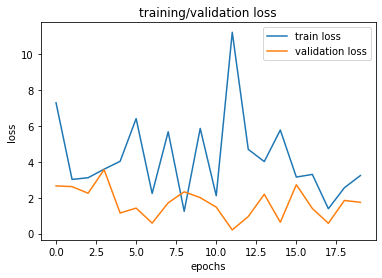

In [0]:
plt.plot(np.arange(0,len(train_acc_v1)),train_loss_v1,label="train loss")
plt.plot(np.arange(0,len(val_acc_v1)),val_loss_v1,label="validation loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('training/validation loss')
plt.legend()
plt.show()



#train /validation/ test V2 done


In [0]:
import time
import torch.backends.cudnn as cudnn
device = 'cuda' if torch.cuda.is_available() else 'cpu'

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
best_acc = 0  # best test accuracy
start_epoch = 0  # start from epoch 0 or last checkpoint epoch

# Model
print('==> Building model..')
net_v2 = GoogleNet(Inception_v2,len(classes),True)
net_v2 = net_v2.to(device)
if device == 'cuda':
    net_v2 = torch.nn.DataParallel(net_v2)
    cudnn.benchmark = True
#Loss and Optimization
criterion_v2 = nn.CrossEntropyLoss() # It is useful when training a classification problem with `C` classes.
optimizer_v2 = optim.SGD(net_v2.parameters(), lr=0.05)
# optimizer_v2=optim.Adam(net_v1.parameters(), lr=0.05, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)

time_start_v2 = time.time()
train_acc_v2,train_loss_v2,val_acc_v2,val_loss_v2=train(num_epochs=20,net=net_v2,data_loaders=data_loaders,optimizer=optimizer_v2,device=device,criterion=criterion_v2    )
time_end_v2 = time.time()
training_time_v2=time_end_v2-time_start_v2
print("Accuracy = ",train_acc_v2[-1],"Execution Time = ",training_time_v2 ,"seconds")

==> Building model..

Epoch: 0
Train --  0 704   Train loss: 7.673 | Train acc: 9.375% (6/64)
Train --  1 704   Train loss: 3.934 | Train acc: 7.031% (9/128)
Train --  2 704   Train loss: 2.883 | Train acc: 9.375% (18/192)
Train --  3 704   Train loss: 1.935 | Train acc: 8.984% (23/256)
Train --  4 704   Train loss: 1.499 | Train acc: 10.312% (33/320)
Train --  5 704   Train loss: 1.340 | Train acc: 11.198% (43/384)
Train --  6 704   Train loss: 1.086 | Train acc: 11.830% (53/448)
Train --  7 704   Train loss: 0.993 | Train acc: 11.523% (59/512)
Train --  8 704   Train loss: 0.817 | Train acc: 12.326% (71/576)
Train --  9 704   Train loss: 0.743 | Train acc: 12.812% (82/640)
Train --  10 704   Train loss: 0.636 | Train acc: 14.205% (100/704)
Train --  11 704   Train loss: 0.592 | Train acc: 14.974% (115/768)
Train --  12 704   Train loss: 0.618 | Train acc: 15.264% (127/832)
Train --  13 704   Train loss: 0.568 | Train acc: 15.290% (137/896)
Train --  14 704   Train loss: 0.513 | Train

In [0]:
test_loss_v2,test_acc_v2=test(net=net_v2,loader=test_loader,criterion=criterion_v2,device=device)

 Test Loss: 0.584 | Test Acc: 80.510% (8051/10000)


#saving v2 model done

In [0]:
torch.save(net_v2, "/content/weights_v2_epochs20.pth")
model_2 = torch.load("/content/weights_v2_epochs20.pth")
model_2.eval()
test_loss,test_acc=test(net=model_2,loader=test_loader,criterion=criterion_v1,device=device)

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type DataParallel. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type GoogleNet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type BasicConv2d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Conv2d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/pyt

 Test Loss: 0.584 | Test Acc: 80.510% (8051/10000)


In [0]:
shutil.copy("/content/weights_v2_epochs20.pth","/content/drive/My Drive")


'/content/drive/My Drive/weights_v2_epochs20.pth'

#v2 graphs done

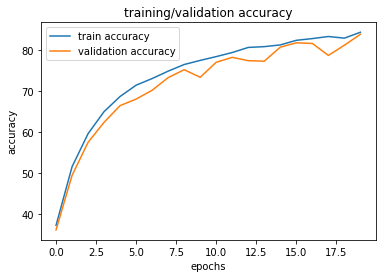

In [0]:
plt.plot(np.arange(0,len(train_acc_v2)),train_acc_v2,label="train accuracy")
plt.plot(np.arange(0,len(val_acc_v2)),val_acc_v2,label="validation accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('training/validation accuracy')
plt.legend()
plt.show()



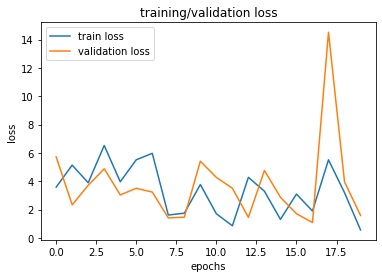

In [0]:
plt.plot(np.arange(0,len(train_acc_v2)),train_loss_v2,label="train loss")
plt.plot(np.arange(0,len(val_acc_v2)),val_loss_v2,label="validation loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('training/validation loss')
plt.legend()
plt.show()

#v1/v2 comparison done

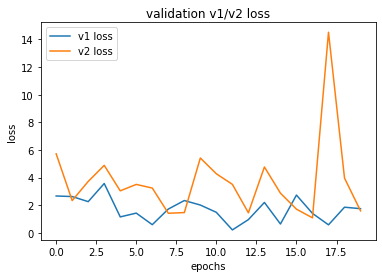

In [0]:
plt.plot(np.arange(0,len(train_acc_v2)),val_loss_v1,label="v1 loss")
plt.plot(np.arange(0,len(val_acc_v2)),val_loss_v2,label="v2 loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('validation v1/v2 loss')
plt.legend()
plt.show()

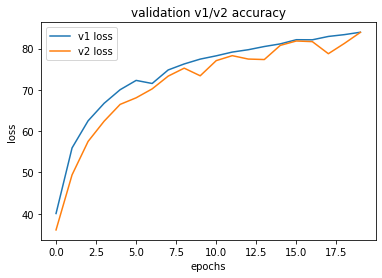

In [0]:
plt.plot(np.arange(0,len(val_acc_v2)),val_acc_v1[:-1],label="v1 loss")
plt.plot(np.arange(0,len(val_acc_v2)),val_acc_v2,label="v2 loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('validation v1/v2 accuracy')
plt.legend()
plt.show()

#extra not done
#comparing defferent learning rates /optimizers 

In [0]:
def compare_different_learning_rate(model_type,epochs,learning_rates):
  #Loss and Optimization
  trains_acc=[]
  trains_loss=[]
  vals_acc=[]
  vals_loss=[]
  times=[]
  for rate in learning_rates:
    model = model_type
    model = model.to(device)
    if device == 'cuda':
      model = torch.nn.DataParallel(model)
      cudnn.benchmark = True
    criterion_v1 = nn.CrossEntropyLoss() # It is useful when training a classification problem with `C` classes.
    optimizer_v1 = optim.SGD(model.parameters(), lr=rate)
    time_start_v1 = time.time()
    train_acc_v1,train_loss_v1,val_acc_v1,val_loss_v1=train(num_epochs=epochs,net=model,data_loaders=data_loaders,optimizer=optimizer_v1,device=device,criterion=criterion_v1    )
    trains_acc.append(train_acc_v1)
    trains_loss.append(train_loss_v1)
    vals_acc.append(val_acc_v1)
    vals_loss.append(val_loss_v1)
    time_end_v1 = time.time()
    training_time_v1=time_end_v1-time_start_v1
    times.append(training_time_v1)
    print("Accuracy = ",train_acc_v1[-1],"Execution Time = ",training_time_v1 ,"seconds")
    path="/content/weights_v1_lr"+str(rate)+"_epochs10.pth"
    torch.save(model, path)

  return trains_acc,trains_loss,vals_acc,vals_loss

In [0]:
learning_rates=[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,.1]

trains_acc,trains_loss,vals_acc,vals_loss=compare_different_learning_rate(GoogleNet(Inception_v1,len(classes),True),1,learning_rates)




Epoch: 0
Train --  0 704   Train loss: 7.496 | Train acc: 4.688% (3/64)
Train --  1 704   Train loss: 3.804 | Train acc: 5.469% (7/128)
Train --  2 704   Train loss: 2.505 | Train acc: 7.292% (14/192)
Train --  3 704   Train loss: 1.930 | Train acc: 7.812% (20/256)
Train --  4 704   Train loss: 1.507 | Train acc: 7.500% (24/320)
Train --  5 704   Train loss: 1.230 | Train acc: 8.073% (31/384)
Train --  6 704   Train loss: 1.029 | Train acc: 8.929% (40/448)
Train --  7 704   Train loss: 0.933 | Train acc: 8.984% (46/512)
Train --  8 704   Train loss: 0.822 | Train acc: 9.375% (54/576)
Train --  9 704   Train loss: 0.725 | Train acc: 10.312% (66/640)
Train --  10 704   Train loss: 0.676 | Train acc: 10.795% (76/704)
Train --  11 704   Train loss: 0.603 | Train acc: 11.198% (86/768)
Train --  12 704   Train loss: 0.567 | Train acc: 11.418% (95/832)
Train --  13 704   Train loss: 0.540 | Train acc: 11.161% (100/896)
Train --  14 704   Train loss: 0.498 | Train acc: 11.042% (106/960)
Train

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type DataParallel. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type GoogleNet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type BasicConv2d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Conv2d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/pyt

Train --  0 704   Train loss: 4.810 | Train acc: 40.625% (26/64)
Train --  1 704   Train loss: 2.531 | Train acc: 41.406% (53/128)
Train --  2 704   Train loss: 1.723 | Train acc: 42.188% (81/192)
Train --  3 704   Train loss: 1.298 | Train acc: 40.234% (103/256)
Train --  4 704   Train loss: 1.027 | Train acc: 41.875% (134/320)
Train --  5 704   Train loss: 0.880 | Train acc: 40.625% (156/384)
Train --  6 704   Train loss: 0.752 | Train acc: 40.179% (180/448)
Train --  7 704   Train loss: 0.630 | Train acc: 41.016% (210/512)
Train --  8 704   Train loss: 0.616 | Train acc: 41.146% (237/576)
Train --  9 704   Train loss: 0.584 | Train acc: 40.000% (256/640)
Train --  10 704   Train loss: 0.561 | Train acc: 39.773% (280/704)
Train --  11 704   Train loss: 0.351 | Train acc: 40.755% (313/768)
Train --  12 704   Train loss: 0.395 | Train acc: 40.625% (338/832)
Train --  13 704   Train loss: 0.410 | Train acc: 39.732% (356/896)
Train --  14 704   Train loss: 0.334 | Train acc: 39.688% (381

In [0]:
for i in range(0,len(learning_rates)):
  plt.title("learning rate trianing acc comparison")
  plt.plot(np.arange(0,len(trains_acc[i])),trains_acc[i],label="learning rate ="+str(learning_rates[i]))

plt.legend()
plt.show()


In [0]:
for i in range(0,len(learning_rates)):
  plt.title("learning rate trianing loss comparison")
  plt.plot(np.arange(0,len(trains_acc[i])),trains_loss[i],label="learning rate ="+str(learning_rates[i]))

plt.legend()
plt.show()


In [0]:
for i in range(0,len(learning_rates)):
  plt.title("learning rate validation acc comparison")
  plt.plot(np.arange(0,len(trains_acc[i])),vals_acc[i],label="learning rate ="+str(learning_rates[i]))

plt.legend()
plt.show()


In [0]:
for i in range(0,len(learning_rates)):
  plt.title("learning rate validation loss comparison")
  plt.plot(np.arange(0,len(trains_acc[i])),vals_loss[i],label="learning rate ="+str(learning_rates[i]))

plt.legend()
plt.show()


In [0]:
model = torch.load("/content/weights_v1_lr0.07_epochs10.pth")
model.eval()
test_loss,test_acc=test(net=model,loader=test_loader,criterion=criterion_v1,device=device)

 Test Loss: 1.122 | Test Acc: 65.890% (6589/10000)


In [0]:
# train_acc_v3,train_loss_v3,val_acc_v3,val_loss_v3=train(num_epochs=1,net=model,data_loaders=data_loaders,optimizer=optimizer_v1,device=device,criterion=criterion_v1    )
test_loss,test_acc=test(net=model,loader=test_loader,criterion=criterion_v1,device=device)

 Test Loss: 0.960 | Test Acc: 68.130% (6813/10000)


In [0]:
torch.save(model, "/content/weights_v1_lr0.07_epochs10.pth")


/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type DataParallel. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type GoogleNet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type BasicConv2d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Conv2d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/pyt

In [0]:
print(trains_acc)

[[35.18888888888889], [47.81111111111111], [56.04222222222222], [61.964444444444446], [65.87333333333333], [68.49555555555555], [70.56666666666666], [72.42], [73.41555555555556], [73.28888888888889]]


In [0]:
def compare_different_optimizers(model,epochs,optmizers):
  # net_v1 = GoogleNet(Inception_v1,len(classes),True)
  model = model.to(device)
  if device == 'cuda':
    model = torch.nn.DataParallel(model)
    cudnn.benchmark = True
  #Loss and Optimization
  trains_acc=[]
  trains_loss=[]
  vals_acc=[]
  vals_loss=[]
  times=[]
  i=0
  for optimizer in optimizers:
    criterion_v1 = nn.CrossEntropyLoss() # It is useful when training a classification problem with `C` classes.
    # optimizer_v1 = optim.SGD(model.parameters(), lr=rate)
    time_start_v1 = time.time()
    train_acc_v1,train_loss_v1,val_acc_v1,val_loss_v1=train(num_epochs=epochs,net=model,data_loaders=data_loaders,optimizer=optimizer,device=device,criterion=criterion_v1    )
    trains_acc.append(train_acc_v1)
    trains_loss.append(train_loss_v1)
    vals_acc.append(val_acc_v1)
    vals_loss.append(val_loss_v1)
    time_end_v1 = time.time()
    training_time_v1=time_end_v1-time_start_v1
    times.append(training_time_v1)
    print("Accuracy = ",train_acc_v1[-1],"Execution Time = ",training_time_v1 ,"seconds")
    path="/content/weights_v1_optimizer"+str(i)+"_epochs10.pth"
    i+=1

    torch.save(model, path)

  return trains_acc,trains_loss,vals_acc,vals_loss

In [0]:
optimizers=[]
optimizers.append(optim.SGD(model.parameters(), lr=0.05))
optimizers.append(optim.Adadelta(model.parameters(), lr=1.0, rho=0.9, eps=1e-06, weight_decay=0))
optimizers.append(optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False))
optimizers.append(optim.Adagrad(model.parameters(), lr=0.01, lr_decay=0, weight_decay=0, initial_accumulator_value=0, eps=1e-10))
trains_acc_2,trains_loss_2,vals_acc_2,vals_loss_2=compare_different_optimizers(GoogleNet(Inception_v1,len(classes),True),2,optimizers)


Epoch: 0
Train --  0 704   Train loss: 7.591 | Train acc: 12.500% (8/64)
Train --  1 704   Train loss: 3.667 | Train acc: 13.281% (17/128)
Train --  2 704   Train loss: 2.488 | Train acc: 12.500% (24/192)
Train --  3 704   Train loss: 1.871 | Train acc: 12.109% (31/256)
Train --  4 704   Train loss: 1.544 | Train acc: 10.938% (35/320)
Train --  5 704   Train loss: 1.250 | Train acc: 10.938% (42/384)
Train --  6 704   Train loss: 1.089 | Train acc: 10.938% (49/448)
Train --  7 704   Train loss: 0.946 | Train acc: 11.133% (57/512)
Train --  8 704   Train loss: 0.844 | Train acc: 11.285% (65/576)
Train --  9 704   Train loss: 0.756 | Train acc: 10.938% (70/640)
Train --  10 704   Train loss: 0.690 | Train acc: 10.653% (75/704)
Train --  11 704   Train loss: 0.641 | Train acc: 10.547% (81/768)
Train --  12 704   Train loss: 0.574 | Train acc: 11.058% (92/832)
Train --  13 704   Train loss: 0.542 | Train acc: 10.826% (97/896)
Train --  14 704   Train loss: 0.502 | Train acc: 10.521% (101/9

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type DataParallel. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type GoogleNet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type BasicConv2d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Conv2d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/pyt

Train --  0 704   Train loss: 7.629 | Train acc: 12.500% (8/64)
Train --  1 704   Train loss: 3.773 | Train acc: 12.500% (16/128)
Train --  2 704   Train loss: 2.530 | Train acc: 11.458% (22/192)
Train --  3 704   Train loss: 1.877 | Train acc: 12.109% (31/256)
Train --  4 704   Train loss: 1.506 | Train acc: 12.188% (39/320)
Train --  5 704   Train loss: 1.276 | Train acc: 11.979% (46/384)
Train --  6 704   Train loss: 1.081 | Train acc: 11.830% (53/448)
Train --  7 704   Train loss: 0.932 | Train acc: 11.914% (61/512)
Train --  8 704   Train loss: 0.822 | Train acc: 12.326% (71/576)
Train --  9 704   Train loss: 0.748 | Train acc: 12.812% (82/640)
Train --  10 704   Train loss: 0.690 | Train acc: 12.784% (90/704)
Train --  11 704   Train loss: 0.639 | Train acc: 12.370% (95/768)
Train --  12 704   Train loss: 0.583 | Train acc: 11.899% (99/832)
Train --  13 704   Train loss: 0.549 | Train acc: 11.607% (104/896)
Train --  14 704   Train loss: 0.504 | Train acc: 11.667% (112/960)
Train

In [0]:
print(trains_acc_2)

[[10.553333333333333, 10.606666666666667], [10.72888888888889, 10.36], [10.437777777777777, 10.30888888888889], [10.491111111111111, 10.375555555555556]]
